In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pyodbc
import math

In [12]:
sql_conn = pyodbc.connect('DRIVER={SQL Server};'
                            'SERVER=L_AAGDATIX;'
                            'DATABASE=DatixCRM;'
                            'Trusted_Connection=yes') 
query = "set transaction isolation level read uncommitted select inc_dincident,inc_time,inc_dreported,inc_submittedtime,inc_reportedby from DatixCRM.dbo.incidents_main where inc_type='PAT' and inc_category='MEDIC' and inc_organisation='QA'"
df = pd.read_sql(query, sql_conn)
print(df)

     inc_dincident inc_time inc_dreported inc_submittedtime  \
0       2016-03-31     0800    2016-03-31              2025   
1       2016-03-31     2100    2016-04-01              1553   
2       2016-04-01     1957    2016-04-01              2002   
3       2016-03-25     1400    2016-04-01              2126   
4       2016-04-02     0730    2016-04-02              0752   
5       2016-04-01     1200    2016-04-02              1042   
6       2016-04-01     1800    2016-04-02              1051   
7       2016-04-02     1600    2016-04-02              1713   
8       2016-04-02     1700    2016-04-02              1806   
9       2016-04-03     1630    2016-04-03              1710   
10      2016-04-03     1715    2016-04-03              1917   
11      2016-04-02     1000    2016-04-04              1150   
12      2016-04-02     1000    2016-04-04              1209   
13      2016-04-02     1000    2016-04-04              1350   
14      2016-04-02     1100    2016-04-04              

In [13]:
df['inc_time'] = df['inc_time'].str.replace(':','')
df['inc_submittedtime'] = df['inc_submittedtime'].str.replace(':','')

In [14]:
df_inc = df.copy()
df_inc = df_inc[df_inc.inc_dincident > '2016-03-31']
df_inc = df_inc[df_inc.inc_dincident < '2019-11-18']
print(df_inc)

     inc_dincident inc_time inc_dreported inc_submittedtime  \
2       2016-04-01     1957    2016-04-01              2002   
4       2016-04-02     0730    2016-04-02              0752   
5       2016-04-01     1200    2016-04-02              1042   
6       2016-04-01     1800    2016-04-02              1051   
7       2016-04-02     1600    2016-04-02              1713   
8       2016-04-02     1700    2016-04-02              1806   
9       2016-04-03     1630    2016-04-03              1710   
10      2016-04-03     1715    2016-04-03              1917   
11      2016-04-02     1000    2016-04-04              1150   
12      2016-04-02     1000    2016-04-04              1209   
13      2016-04-02     1000    2016-04-04              1350   
14      2016-04-02     1100    2016-04-04              1420   
15      2016-04-02     1200    2016-04-04              1431   
16      2016-04-04     1450    2016-04-04              1503   
17      2016-04-02     1200    2016-04-04              

In [29]:
df_inc['hour'] = df_inc['inc_time'].str[:2]
df_inc['minute'] = df_inc['inc_time'].str[2:]
df_inc = df_inc.astype({'hour':'int'})
df_inc = df_inc.astype({'minute':'int'})
df_inc = df_inc.astype({'inc_time':'int'})
print(df_inc[df_inc.hour == 23])

     inc_dincident  inc_time inc_dreported inc_submittedtime  \
80      2016-04-14      2300    2016-04-15              2326   
101     2016-04-20      2359    2016-04-21              1713   
146     2016-05-01      2300    2016-05-02              0830   
166     2016-05-05      2315    2016-05-06              0706   
184     2016-05-08      2300    2016-05-09              0058   
527     2016-07-14      2330    2016-07-15              1301   
580     2016-07-28      2347    2016-07-29              0003   
581     2016-07-28      2300    2016-07-29              0557   
612     2016-08-03      2300    2016-08-04              0050   
613     2016-08-03      2300    2016-08-04              0518   
621     2016-08-02      2339    2016-08-05              0854   
629     2016-08-08      2300    2016-08-09              0458   
689     2016-08-21      2300    2016-08-22              0032   
798     2016-09-11      2330    2016-09-12              0044   
827     2016-09-15      2300    2016-09-

In [16]:
total_days = (max(df_inc.inc_dincident)-min(df_inc.inc_dincident)).days

In [31]:
f_first = lambda i: i*100
f_second = lambda i: i*100+30
bins = [f(i) for i in range(25) for f in (f_first,f_second)]
bins = bins[:-1]
print(bins)
data_x = bins[:-1]
data_y_tot,_ = np.histogram(df_inc['inc_time'].values, bins=bins)
data_y = data_y_tot/total_days
data_y_err = np.sqrt(data_y_tot)/total_days

[0, 30, 100, 130, 200, 230, 300, 330, 400, 430, 500, 530, 600, 630, 700, 730, 800, 830, 900, 930, 1000, 1030, 1100, 1130, 1200, 1230, 1300, 1330, 1400, 1430, 1500, 1530, 1600, 1630, 1700, 1730, 1800, 1830, 1900, 1930, 2000, 2030, 2100, 2130, 2200, 2230, 2300, 2330, 2400]


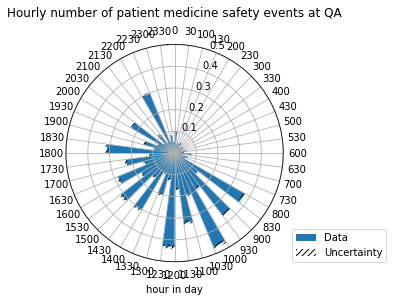

In [32]:
# Compute pie slices
N = 48
width = 2 * np.pi/N
theta = np.linspace(0.0 + width, 2 * np.pi + width, N, endpoint=False)
theta_deg = np.linspace(0.0 + 360/(2*N), 360 + 360/(2*N), N, endpoint=False)
radii = data_y
radii_err = data_y_err

ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width,label='Data');
ax.bar(theta, radii_err, bottom=radii-radii_err/2,width=width,alpha=0.5,color='none',hatch="////",label='Uncertainty');
ax.set_theta_offset(np.pi/2 + width/2)
ax.set_theta_direction(-1)
plt.xlabel('hour in day')
plt.title('Hourly number of patient medicine safety events at QA',y=1.1)
plt.legend(loc=(1.04,0))
lines, labels = plt.thetagrids( theta_deg, (data_x) )

In [90]:
morning_radii = np.zeros(len(radii))
afternoon_radii = np.zeros(len(radii))
evening_radii = np.zeros(len(radii))
for i in range(24):
    print(i)
    if i <= 7: morning_radii[i] = radii[i]
    elif i >= 8 and i <= 15: afternoon_radii[i] = radii[i]
    else: evening_radii[i] = radii[i]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


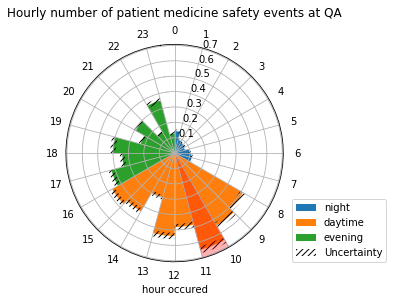

In [91]:
ax = plt.subplot(111, projection='polar');
ax.bar(theta, morning_radii, width=width,label='night');
ax.bar(theta, afternoon_radii, width=width,label='daytime');
ax.bar(theta, evening_radii, width=width,label='evening');
ax.bar(theta, 2*radii_err, bottom=radii-radii_err,width=width,alpha=0.5,color='none',hatch="////",label='Uncertainty');
ax.set_theta_offset(np.pi/2 + width/2)
ax.set_theta_direction(-1)
#ax.set_yticklabels([])
plt.xlabel('hour occured')
plt.title('Hourly number of patient medicine safety events at QA',y=1.1)
plt.legend(loc=(1.04,0))
lines, labels = plt.thetagrids( theta_deg, (data_x) );
ax.axvspan(theta[np.argmax(radii)]-width/2,theta[np.argmax(radii)]+width/2,color='red',alpha=0.3);

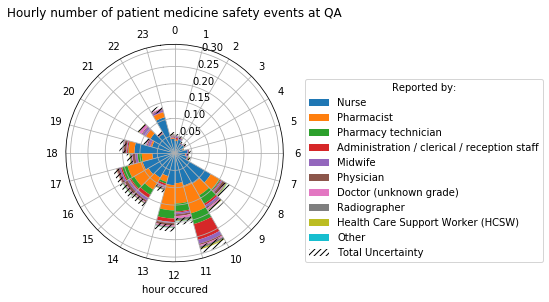

In [92]:
reportedby_counts = df['inc_reportedby'].value_counts().drop(labels=[''])
reportedby_counts_nlargest = reportedby_counts.nlargest(9)
thresh = reportedby_counts_nlargest[-1]
reportedby_counts = reportedby_counts.append(pd.Series(reportedby_counts[reportedby_counts.values < thresh].sum(),index=['Other']))
reportedby_counts = reportedby_counts[reportedby_counts.values >= thresh]

ax = plt.subplot(111, projection='polar')
cumulative_bottom = 0
for i,counts in reportedby_counts.items():
    radii_reported_tot,_ = np.histogram(df_inc[df_inc['inc_reportedby']==i].hour.values, bins=bins)
    radii_reported = radii_reported_tot/total_days
    ax.bar(theta, radii_reported, bottom=cumulative_bottom, width=width, label=i);
    cumulative_bottom += radii_reported

ax.bar(theta, radii_err, bottom=cumulative_bottom-radii_err/2,width=width,alpha=0.5,color='none',hatch="////",label='Total Uncertainty');
ax.set_theta_offset(np.pi/2 + width/2)
ax.set_theta_direction(-1)
#ax.set_yticklabels([])
plt.xlabel('hour occured')
plt.title('Hourly number of patient medicine safety events at QA',y=1.1)
plt.legend(loc=(1.1,0),title='Reported by:')
lines, labels = plt.thetagrids( theta_deg, (data_x) )

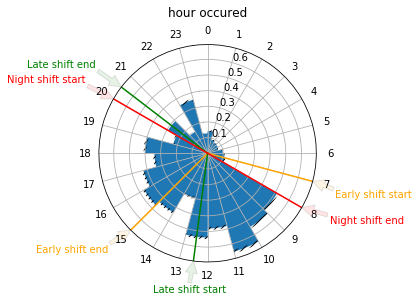

In [96]:
ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width,label='Data');
ax.bar(theta, radii_err, bottom=radii-radii_err/2,width=width,alpha=0.5,color='none',hatch="////",label='Uncertainty');
ax.set_theta_offset(np.pi/2 + width/2)
ax.set_theta_direction(-1)
#ax.set_yticklabels([])
plt.title('hour occured',y=1.1)
lines, labels = plt.thetagrids( theta_deg, (data_x) )
ax.axvline(theta[7]-width/2,color='orange');
ax.axvline(theta[15]-width/2,color='orange');
ax.axvline(theta[12],color='green');
ax.axvline(theta[20],color='green');
ax.axvline(theta[20]-width/2,color='red');
ax.axvline(theta[8]-width/2,color='red');
ax.annotate('Early shift start',xy=(theta[7]-width/2,ax.get_ylim()[1]),xytext=(theta[7]-width/2,1.1),color='orange',ha='center',
           arrowprops=dict(facecolor='orange',alpha=0.1));
ax.annotate('Early shift end',xy=(theta[15]-width/2,ax.get_ylim()[1]),xytext=(theta[15]-width/2,0.9),color='orange',ha='right',
           arrowprops=dict(facecolor='orange',alpha=0.1));
ax.annotate('Late shift start',xy=(theta[12],ax.get_ylim()[1]),xytext=(theta[12],0.9),color='green',ha='center',
           arrowprops=dict(facecolor='green',alpha=0.1));
ax.annotate('Late shift end',xy=(theta[20],ax.get_ylim()[1]),xytext=(theta[20],0.9),color='green',ha='right',
           arrowprops=dict(facecolor='green',alpha=0.1));
ax.annotate('Night shift start',xy=(theta[20]-width/2,ax.get_ylim()[1]),xytext=(theta[20]-width/2,0.9),color='red',ha='right',
           arrowprops=dict(facecolor='red',alpha=0.1));
ax.annotate('Night shift end',xy=(theta[8]-width/2,ax.get_ylim()[1]),xytext=(theta[8]-width/2,0.9),color='red',ha='left',
           arrowprops=dict(facecolor='red',alpha=0.1));

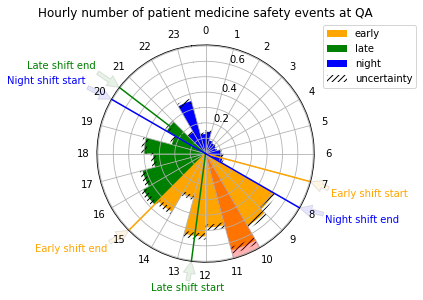

In [120]:
early_radii = np.zeros(len(radii))
late_radii = np.zeros(len(radii))
night_radii = np.zeros(len(radii))
for i in range(24):
    if i >= 8 and i <= 14: early_radii[i] = radii[i]
    elif i >= 15 and i <= 20: late_radii[i] = radii[i]
    else: night_radii[i] = radii[i]
ax = plt.subplot(111, projection='polar');
ax.bar(theta, early_radii, width=width,label='early',color='orange');
ax.bar(theta, late_radii, width=width,label='late',color='green');
ax.bar(theta, night_radii, width=width,label='night',color='blue');
ax.bar(theta, 2*radii_err, bottom=radii-radii_err,width=width,alpha=0.5,color='none',hatch="////",label='uncertainty');
ax.set_theta_offset(np.pi/2 + width/2)
ax.set_theta_direction(-1)
ax.set_yticklabels(['',0.2,'',0.4,'',0.6])
#plt.xlabel('hour occured')
plt.title('Hourly number of patient medicine safety events at QA',y=1.1)
plt.legend(loc=(1.04,0.8))
lines, labels = plt.thetagrids( theta_deg, (data_x) );
ax.axvspan(theta[np.argmax(radii)]-width/2,theta[np.argmax(radii)]+width/2,color='red',alpha=0.3);
ax.axvline(theta[7]-width/2,color='orange');
ax.axvline(theta[15]-width/2,color='orange');
ax.axvline(theta[12],color='green');
ax.axvline(theta[20],color='green');
ax.axvline(theta[20]-width/2,color='blue');
ax.axvline(theta[8]-width/2,color='blue');
ax.annotate('Early shift start',xy=(theta[7]-width/2,ax.get_ylim()[1]),xytext=(theta[7]-width/2,1.1),color='orange',ha='center',
           arrowprops=dict(facecolor='orange',alpha=0.1));
ax.annotate('Early shift end',xy=(theta[15]-width/2,ax.get_ylim()[1]),xytext=(theta[15]-width/2,0.9),color='orange',ha='right',
           arrowprops=dict(facecolor='orange',alpha=0.1));
ax.annotate('Late shift start',xy=(theta[12],ax.get_ylim()[1]),xytext=(theta[12],0.9),color='green',ha='center',
           arrowprops=dict(facecolor='green',alpha=0.1));
ax.annotate('Late shift end',xy=(theta[20],ax.get_ylim()[1]),xytext=(theta[20],0.9),color='green',ha='right',
           arrowprops=dict(facecolor='green',alpha=0.1));
ax.annotate('Night shift start',xy=(theta[20]-width/2,ax.get_ylim()[1]),xytext=(theta[20]-width/2,0.9),color='blue',ha='right',
           arrowprops=dict(facecolor='blue',alpha=0.1));
ax.annotate('Night shift end',xy=(theta[8]-width/2,ax.get_ylim()[1]),xytext=(theta[8]-width/2,0.9),color='blue',ha='left',
           arrowprops=dict(facecolor='blue',alpha=0.1));

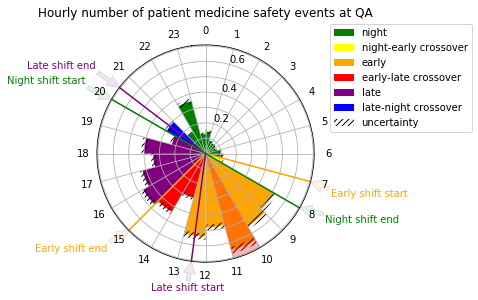

In [133]:
night_radii = np.zeros(len(radii))
night_early_radii = np.zeros(len(radii))
early_radii = np.zeros(len(radii))
early_late_radii = np.zeros(len(radii))
late_radii = np.zeros(len(radii))
late_night_radii = np.zeros(len(radii))
for i in range(24):
    if i==7: night_early_radii[i] = radii[i]
    elif i >= 8 and i <= 12: early_radii[i] = radii[i]
    elif i==13 or i==14: early_late_radii[i] = radii[i]
    elif i >= 15 and i <= 19: late_radii[i] = radii[i]
    elif i==20: late_night_radii[i] = radii[i]
    else: night_radii[i] = radii[i]
ax = plt.subplot(111, projection='polar');
ax.bar(theta, night_radii, width=width,label='night',color='green');
ax.bar(theta, night_early_radii, width=width, label='night-early crossover', color='yellow')
ax.bar(theta, early_radii, width=width,label='early',color='orange');
ax.bar(theta, early_late_radii, width=width, label='early-late crossover', color='red')
ax.bar(theta, late_radii, width=width,label='late',color='purple');
ax.bar(theta, late_night_radii, width=width, label='late-night crossover', color='blue')
ax.bar(theta, 2*radii_err, bottom=radii-radii_err,width=width,alpha=0.5,color='none',hatch="////",label='uncertainty');
ax.set_theta_offset(np.pi/2 + width/2)
ax.set_theta_direction(-1)
ax.set_yticklabels(['',0.2,'',0.4,'',0.6])
#plt.xlabel('hour occured')
plt.title('Hourly number of patient medicine safety events at QA',y=1.1)
plt.legend(loc=(1.07,0.6),title='Shifts')
lines, labels = plt.thetagrids( theta_deg, (data_x) );
ax.axvspan(theta[np.argmax(radii)]-width/2,theta[np.argmax(radii)]+width/2,color='red',alpha=0.3);
ax.axvline(theta[7]-width/2,color='orange');
ax.axvline(theta[15]-width/2,color='orange');
ax.axvline(theta[12],color='purple');
ax.axvline(theta[20],color='purple');
ax.axvline(theta[20]-width/2,color='green');
ax.axvline(theta[8]-width/2,color='green');
ax.annotate('Early shift start',xy=(theta[7]-width/2,ax.get_ylim()[1]),xytext=(theta[7]-width/2,1.1),color='orange',ha='center',
           arrowprops=dict(facecolor='orange',alpha=0.1));
ax.annotate('Early shift end',xy=(theta[15]-width/2,ax.get_ylim()[1]),xytext=(theta[15]-width/2,0.9),color='orange',ha='right',
           arrowprops=dict(facecolor='orange',alpha=0.1));
ax.annotate('Late shift start',xy=(theta[12],ax.get_ylim()[1]),xytext=(theta[12],0.9),color='purple',ha='center',
           arrowprops=dict(facecolor='purple',alpha=0.1));
ax.annotate('Late shift end',xy=(theta[20],ax.get_ylim()[1]),xytext=(theta[20],0.9),color='purple',ha='right',
           arrowprops=dict(facecolor='purple',alpha=0.1));
ax.annotate('Night shift start',xy=(theta[20]-width/2,ax.get_ylim()[1]),xytext=(theta[20]-width/2,0.9),color='green',ha='right',
           arrowprops=dict(facecolor='green',alpha=0.1));
ax.annotate('Night shift end',xy=(theta[8]-width/2,ax.get_ylim()[1]),xytext=(theta[8]-width/2,0.9),color='green',ha='left',
           arrowprops=dict(facecolor='green',alpha=0.1));

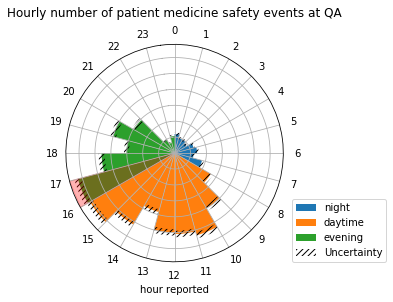

In [81]:
df_rep = df.copy()
df_rep = df_rep[df_rep.inc_dreported > '2016-03-31']
df_rep = df_rep[df_rep.inc_dreported < '2019-10-01']
df_rep['rep_hour'] = df_rep['inc_submittedtime'].str[:2]
df_rep = df_rep.astype({'rep_hour':'int'})
data_y_tot,_ = np.histogram(df_rep.rep_hour.values, bins=bins)
data_y = data_y_tot/total_days
data_y_err = np.sqrt(data_y_tot)/total_days
radii = data_y
radii_err = data_y_err
morning_radii = np.zeros(len(radii))
afternoon_radii = np.zeros(len(radii))
evening_radii = np.zeros(len(radii))
for i in range(24):
    if i <= 7: morning_radii[i] = radii[i]
    elif i >= 8 and i <= 15: afternoon_radii[i] = radii[i]
    else: evening_radii[i] = radii[i]
ax = plt.subplot(111, projection='polar');
ax.bar(theta, morning_radii, width=width,label='night');
ax.bar(theta, afternoon_radii, width=width,label='daytime');
ax.bar(theta, evening_radii, width=width,label='evening');
ax.bar(theta, 2*radii_err, bottom=radii-radii_err,width=width,alpha=0.5,color='none',hatch="////",label='Uncertainty');
ax.set_theta_offset(np.pi/2 + width/2)
ax.set_theta_direction(-1)
ax.set_yticklabels([])
plt.xlabel('hour reported')
plt.title('Hourly number of patient medicine safety events at QA',y=1.1)
plt.legend(loc=(1.04,0))
lines, labels = plt.thetagrids( theta_deg, (data_x) );
ax.axvspan(theta[np.argmax(radii)]-width/2,theta[np.argmax(radii)]+width/2,color='red',alpha=0.3);

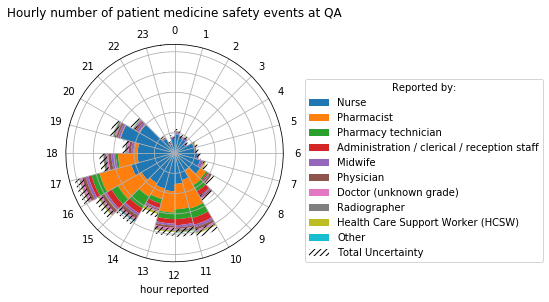

In [82]:
reportedby_counts = df['inc_reportedby'].value_counts().drop(labels=[''])
reportedby_counts_nlargest = reportedby_counts.nlargest(9)
thresh = reportedby_counts_nlargest[-1]
reportedby_counts = reportedby_counts.append(pd.Series(reportedby_counts[reportedby_counts.values < thresh].sum(),index=['Other']))
reportedby_counts = reportedby_counts[reportedby_counts.values >= thresh]

ax = plt.subplot(111, projection='polar')
cumulative_bottom = 0
for i,counts in reportedby_counts.items():
    radii_reported_tot,_ = np.histogram(df_rep[df_rep['inc_reportedby']==i].rep_hour.values, bins=bins)
    radii_reported = radii_reported_tot/total_days
    ax.bar(theta, radii_reported, bottom=cumulative_bottom, width=width, label=i);
    cumulative_bottom += radii_reported

ax.bar(theta, radii_err, bottom=cumulative_bottom-radii_err/2,width=width,alpha=0.5,color='none',hatch="////",label='Total Uncertainty');
ax.set_theta_offset(np.pi/2 + width/2)
ax.set_theta_direction(-1)
ax.set_yticklabels([])
plt.xlabel('hour reported')
plt.title('Hourly number of patient medicine safety events at QA',y=1.1)
plt.legend(loc=(1.1,0),title='Reported by:')
lines, labels = plt.thetagrids( theta_deg, (data_x) )

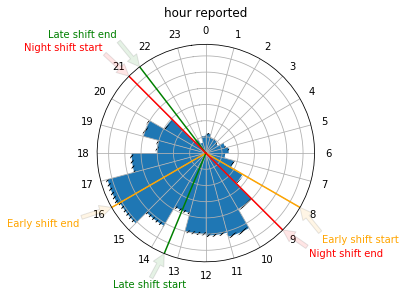

In [83]:
ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width,label='Data');
ax.bar(theta, radii_err, bottom=radii-radii_err/2,width=width,alpha=0.5,color='none',hatch="////",label='Uncertainty');
ax.set_theta_offset(np.pi/2 + width/2)
ax.set_theta_direction(-1)
ax.set_yticklabels([])
#plt.xlabel('hour in day')
plt.title('hour reported',y=1.1)
#plt.legend(loc=(1.04,0))
lines, labels = plt.thetagrids( theta_deg, (data_x) )
ax.axvline(theta[7]-width/2,color='orange');
ax.axvline(theta[15]-width/2,color='orange');
ax.axvline(theta[12],color='green');
ax.axvline(theta[20],color='green');
ax.axvline(theta[20]-width/2,color='red');
ax.axvline(theta[8]-width/2,color='red');
ax.annotate('Early shift start',xy=(theta[7]-width/2,ax.get_ylim()[1]),xytext=(theta[7]-width/2,1.1),color='orange',ha='center',
           arrowprops=dict(facecolor='orange',alpha=0.1));
ax.annotate('Early shift end',xy=(theta[15]-width/2,ax.get_ylim()[1]),xytext=(theta[15]-width/2,0.9),color='orange',ha='right',
           arrowprops=dict(facecolor='orange',alpha=0.1));
ax.annotate('Late shift start',xy=(theta[12],ax.get_ylim()[1]),xytext=(theta[12],0.9),color='green',ha='center',
           arrowprops=dict(facecolor='green',alpha=0.1));
ax.annotate('Late shift end',xy=(theta[20],ax.get_ylim()[1]),xytext=(theta[20],0.9),color='green',ha='right',
           arrowprops=dict(facecolor='green',alpha=0.1));
ax.annotate('Night shift start',xy=(theta[20]-width/2,ax.get_ylim()[1]),xytext=(theta[20]-width/2,0.9),color='red',ha='right',
           arrowprops=dict(facecolor='red',alpha=0.1));
ax.annotate('Night shift end',xy=(theta[8]-width/2,ax.get_ylim()[1]),xytext=(theta[8]-width/2,0.9),color='red',ha='left',
           arrowprops=dict(facecolor='red',alpha=0.1));